# 1. 크롤링 설정

In [1]:
import requests
from bs4 import BeautifulSoup
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}

# 2. 엑셀화 설정

In [2]:
import openpyxl
excel_file = openpyxl.Workbook()
excel_sheet = excel_file.active

# find, find_all로 찾기
- Q-1) #section_body > ul.type06_headline > li > dl > dt > a
- Q-1) 위 태그에서 a를 뽑아야 한다. find -> find_all을 통해서 상세하게 추출해야만 한다.
- Q-1) 그렇다면 위에서 find함수를 선언할 태그는? ul일까 section일까
-  
- Q-2) find함수에서 id를 쓰려면? 
- A-2) id = ''으로 사용하라고 했는데 아닌 것 같다
-  
- Q-3) find, find_all함수의 변수 타입은?
- A-3) find는 bs4.element.Tag이며 find_all은 bs4.element.ResultSet이다.

# select로 찾기
- New) 다른 사이트를 뽑아보자. 무엇이 잘못된 것인지 파악해보자

# OKKY 사이트 게시글 크롤링
## 대상 : 1~3페이지까지

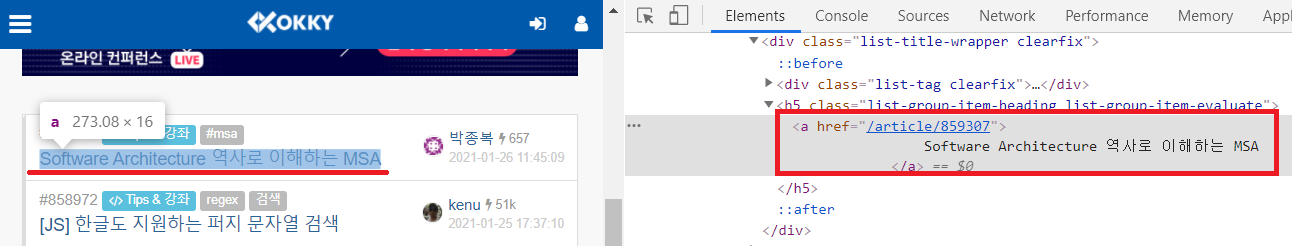

In [18]:
# 크롤링 대상은 하단 이미지
from IPython.display import Image
# 가져올 부분의 copy seletor #list-article > div.panel.panel-default > ul > li > div.list-title-wrapper.clearfix > h5 > a
Image("img/okky대상.png")

In [14]:
for index in range(0,60,20): # 0 ~ 40까지, 20씩 증가
    res = requests.get("https://okky.kr/articles/tech?offset="+ str(index)+"&max=20&sort=id&order=desc",headers=headers)
    soup = BeautifulSoup(res.content,"html.parser")
    # 가져올 부분의 copy seletor #list-article > div.panel.panel-default > ul > li > div.list-title-wrapper.clearfix > h5 > a
    allData = soup.select('#list-article > div.panel.panel-default > ul > li > div.list-title-wrapper.clearfix > h5 > a')
    for item in allData : 
        print(item.get_text().strip())

크롬OS, 맥OS 제쳤다....PC용 OS 점유율 2위
(02/20) '패배자같은 개발 직무' 탈출법
AWS 시스템 매니저로 관리형 EC2 인스턴스에 연결하기
github 스카이라인
스프링 사이트(spring.io)를 로컬에서 실행하기
spring boot 로컬에서 smtp mail 테스트하기
IoT디바이스를 위한 다양한 프레임워크/OS 소개!
[링크] 개발자가 처음 Docker 접할때 오는 멘붕 몇가지
Noticon 프로젝트 리뷰 - 돈 한 푼 안들이고 서비스를 운영하기 위한 노력
리액트 json으로 일부만 추출하기
Jenkins + Docker + AWS EC2 + Spring Boot
코딩 플레이그라운드 만들며 맛보는 요즘 FE 개발 환경 Part 1
윤년인지 확인하는 JS
Bounded Context 어떻게 식별할 것 인가?
(02/13) 라인개발자들이 직접 뽑은 인생 책은?
maven central에 artifact 업로드
깃헙 1초만에 VS Code로 보는 법
개발언어 Rust 가 Rust 재단으로 독립 / AWS, 화웨이, 구글, 마소, 모질라에서 지원
[iOS] WKWebView에서 Native <-> Javascript간 Communication개선
프로그램 소스에 비번, API키 등의 하드코딩 피하는 법 #환경변수
스프링 부트에서 모든 메시지 코드 가져오기
WebUtils.getNativeRequest 요청 래팽 해제
message.properties → *.json 변환하여 프론트 프로젝트에 넣기. (gradle)
DDD 아는 척 해보기
도커 기초 명령어 #스프링부트
7년 차 SI 개발자가 솔루션 회사 이직 후 2년 간 배운 것
logback 5분 마다 logfile 생성하기
Garuda Linux
MySQL 8.0 맥에 설치하기 #DBeaver
스프링 부트 애플리케이션을 Vue와 함께 개발하기
tabulator VS dataTable 비교해본 결과
spring에서 fcm (firebase cloud messaging) push 보내기.
D

## 위 내용을 엑셀파일로 정리하기

In [15]:
for index in range(0,60,20): # 0 ~ 40까지, 20씩 증가
    res = requests.get("https://okky.kr/articles/tech?offset="+ str(index)+"&max=20&sort=id&order=desc",headers=headers)
    soup = BeautifulSoup(res.content,"html.parser")
    # 가져올 부분의 copy seletor #list-article > div.panel.panel-default > ul > li > div.list-title-wrapper.clearfix > h5 > a
    allData = soup.select('#list-article > div.panel.panel-default > ul > li > div.list-title-wrapper.clearfix > h5 > a')
    for item in allData : 
        #print(item.get_text().strip())
        excel_sheet.append([item.get_text()])
excel_file.save('Okky.xlsx')
excel_file.close()